In [3]:
import os
import json
import random

from PIL import Image, ImageDraw, ImageFont

import matplotlib.pyplot as plt
import numpy as np

import lib.detections as detections

font_file = '/root/bryton/aquabyte_sealice/Keyboard.ttf'

font = ImageFont.truetype(font_file, 200)

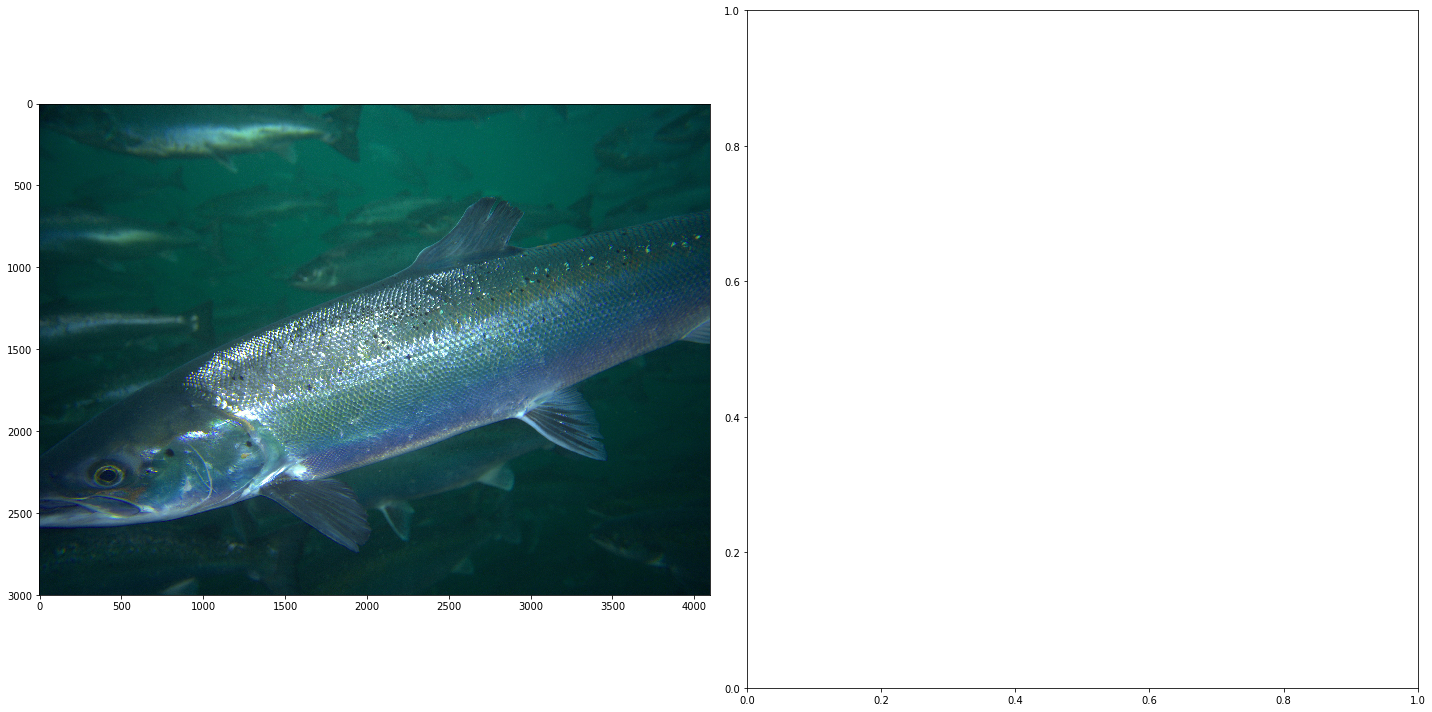

In [4]:
imenco_file = '/root/bryton/aquabyte_sealice/imenco.jpg'

f, ax = plt.subplots(1, 2, figsize = (20, 10))

base_image = Image.open(imenco_file)

ax[0].imshow(np.array(base_image))

plt.tight_layout()
plt.show()

plt.close()

In [5]:
start_index = 0
end_index = 3

output_directory = '/root/bryton/aquabyte_sealice/output'
output_annotations_file = '%s/annotations.json' % (output_directory,)

try: 
    os.makedirs(output_directory)
except OSError:
    if not os.path.isdir(output_directory):
        raise
    

output_jsons = []

for index in range(start_index, end_index + 1):
    image = Image.open(imenco_file)
    
    draw = ImageDraw.Draw(image)
    
    image_name = 'Image %i' % (index,)
    
    draw.text((50, 50), image_name, (255,255,0), font = font)
   
    output_file = '%s/%i.jpg' % (output_directory, index)
    
    image.save(output_file)
    
    width, height = image.size
    
    x1 = random.randint(0, width * 0.75)
    y1 = random.randint(0, height * 0.75)
    x2 = x1 + random.randint(25, 75)
    y2 = y1 + random.randint(25, 75)
    confidence = random.uniform(0.25, 0.75)
    
    print 'Processing Image %i, creating fake bounding box at [%i, %i] to [%i, %i] with confidence %0.2f' % (index, x1, y1, x2, y2, confidence)
    
    raw_lice_detections = [
        { 'x1': x1, 'y1': y2, 'x2': x2, 'y2': y2, 'confidence': confidence }
    ]
    
    output = detections.create_fish_detection(None, raw_lice_detections)
    
    output_json = {
        'fish_detection': output['fish_detection'],
        'lice_detections': output['lice_detections']
    }
    
    output_jsons.append(output_json)

with open(output_annotations_file, 'w') as outfile:
    json.dump(output_jsons, outfile)

Processing Image 0, creating fake bounding box at [2807, 576] to [2870, 633] with confidence 0.51
Processing Image 1, creating fake bounding box at [3, 922] to [60, 972] with confidence 0.60
Processing Image 2, creating fake bounding box at [1110, 328] to [1135, 365] with confidence 0.59
Processing Image 3, creating fake bounding box at [1464, 1771] to [1496, 1804] with confidence 0.45
